In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch import nn
import math

In [2]:
transform = transforms.ToTensor()
trainset = datasets.MNIST('', download=True, train=True, transform=transform)
testset = datasets.MNIST('',download=True, train=False, transform=transform)
trainset,valset=torch.utils.data.random_split(trainset,(50000,10000))
trainloader = torch.utils.data.DataLoader(trainset,batch_size=500)
valloader = torch.utils.data.DataLoader(valset,batch_size=500)
testloader = torch.utils.data.DataLoader(testset,batch_size=500)

HTTPError: ignored

In [ ]:
class RNN(nn.Module):
  def __init__(self):
    super(RNN, self).__init__()
    self.rnn = nn.RNN(28,100)
    self.layer2 = nn.Linear(100, 10)
    
  def forward(self, X):
    X = X.permute(1, 0, 2)
    hiddenlayer=torch.zeros(1,X.size(1),100)
    _,hiddenlayer = self.rnn(X,hiddenlayer)      
    out = self.layer2(hiddenlayer)
    return out.reshape(500,10)

In [ ]:
learning_rate = 0.002
epochs = 10
regul=0.01
criterion1 = nn.CrossEntropyLoss()

In [ ]:
trainingloss_list = []
validationloss_list = []
validationaccuracy_list = []

model1=RNN()
optimizer1 = torch.optim.Adam(model1.parameters(), lr=learning_rate)

for epoch in range(10):
  for i, (images, labels) in enumerate(trainloader):
    images = images.reshape(-1, 28, 28) 
    outputs = model1(images)
    loss = criterion1(outputs, labels)
    trainingloss_list.append(loss.item())
    
    optimizer1.zero_grad()
    loss.backward()
    optimizer1.step()
    
  iteration=0
  tempvalloss=0
  correctval=0    
  
  for images, labels in valloader:
    images = images.reshape(-1, 28, 28) 
    outputs = model1(images)
    loss = criterion1(outputs, labels)
    _, predicted = torch.max(outputs.data, 1)
    correctval += (predicted == labels).sum().item()
    iteration+=1
    tempvalloss+=loss.item()
      
  validationloss_list.append(tempvalloss/iteration)
  validationaccuracy_list.append(correctval/100)
  print('Epoch',epoch+1,'out of',epochs,'epochs are over')

Epoch 1 out of 10 epochs are over
Epoch 2 out of 10 epochs are over
Epoch 3 out of 10 epochs are over
Epoch 4 out of 10 epochs are over
Epoch 5 out of 10 epochs are over
Epoch 6 out of 10 epochs are over
Epoch 7 out of 10 epochs are over
Epoch 8 out of 10 epochs are over
Epoch 9 out of 10 epochs are over
Epoch 10 out of 10 epochs are over


In [ ]:
model1r=RNN()
optimizer1r = torch.optim.Adam(model1r.parameters(), lr=learning_rate)
trainingloss_listr = []
validationloss_listr = []
validationaccuracy_listr = []

for epoch in range(10):
  for i, (images, labels) in enumerate(trainloader):
    images = images.reshape(-1, 28, 28) 
    outputs = model1r(images)
    loss= criterion1(outputs, labels) + regul*torch.norm(model1r.layer2.weight)
    trainingloss_listr.append(loss.item())
    
    optimizer1r.zero_grad()
    loss.backward()
    optimizer1r.step()
    
  iteration=0
  tempvalloss=0
  correctval=0
    
  for images, labels in valloader:
    images = images.reshape(-1, 28, 28) 
    outputs = model1(images)
    loss = criterion1(outputs, labels)
    _, predicted = torch.max(outputs.data, 1)
    correctval += (predicted == labels).sum().item()
    iteration+=1
    tempvalloss+=loss.item()
    
  validationloss_listr.append(tempvalloss/iteration)
  validationaccuracy_listr.append(correctval/100)
  print('Epoch',epoch+1,'out of',epochs,'epochs are over')

Epoch 1 out of 10 epochs are over
Epoch 2 out of 10 epochs are over
Epoch 3 out of 10 epochs are over
Epoch 4 out of 10 epochs are over
Epoch 5 out of 10 epochs are over
Epoch 6 out of 10 epochs are over
Epoch 7 out of 10 epochs are over
Epoch 8 out of 10 epochs are over
Epoch 9 out of 10 epochs are over
Epoch 10 out of 10 epochs are over


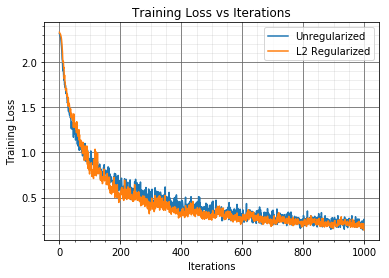

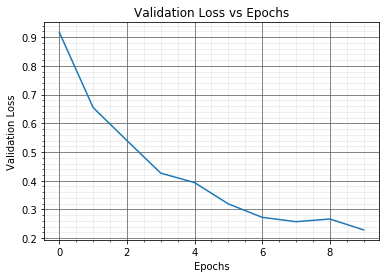

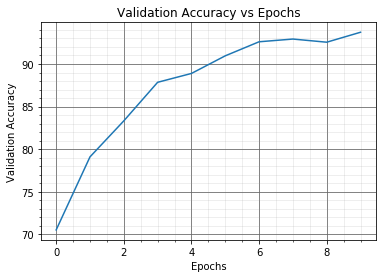

In [ ]:
plt.figure(1)
xtrainloss=np.arange(len(trainingloss_list))
plt.plot(xtrainloss,trainingloss_list,label="Unregularized")
plt.plot(xtrainloss,trainingloss_listr,label="L2 Regularized")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Iterations')

plt.figure(2)
xvalloss=np.arange(len(validationloss_list))
plt.plot(xvalloss,validationloss_list,label="Unregularized")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs Epochs')

plt.figure(3)
plt.plot(xvalloss,validationaccuracy_list,label='Unregularized')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs Epochs')

plt.show()

In [ ]:
model1.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
      images = images.reshape(-1, 28, 28) 
      outputs = model1(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

    print('Test Accuracy of the unregularized model on the 10000 test images: {} %'.format((correct / total) * 100))

model1r.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
      images = images.reshape(-1, 28, 28) 
      outputs = model1r(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

    print('Test Accuracy of the L2 regularized model on the 10000 test images: {} %'.format((correct / total) * 100))    

Test Accuracy of the unregularized model on the 10000 test images: 93.28999999999999 %
Test Accuracy of the L2 regularized model on the 10000 test images: 94.85 %


In [ ]:
class LSTM(nn.Module):
  def __init__(self):
    super(LSTM, self).__init__()
    self.lstm = nn.LSTM(28,100)
    self.layer2 = nn.Linear(100, 10)
    
  def forward(self, X):
    hiddenstate=torch.zeros(1,X.size(0),100)
    cellstate=torch.zeros(1,X.size(0),100)
    X=X.permute(1,0,2)
    out,(hs,cs) = self.lstm(X,(hiddenstate,cellstate)) 
    out = self.layer2(out[27])
    return out.reshape(500,10)

In [ ]:
learning_rate = 0.002
epochs = 10
regul=0.005
criterion2 = nn.CrossEntropyLoss()

In [ ]:
trainingloss_list = []
validationloss_list = []
validationaccuracy_list = []

model2=LSTM()
optimizer2 = torch.optim.Adam(model2.parameters(), lr=learning_rate)

for epoch in range(epochs):
  for i, (images, labels) in enumerate(trainloader):
    images = images.reshape(-1, 28, 28)
    outputs = model2(images)
    loss = criterion2(outputs, labels)
    trainingloss_list.append(loss.item())
    
    optimizer2.zero_grad()
    loss.backward()
    optimizer2.step()
    
  iteration=0
  tempvalloss=0
  correctval=0    
  
  for images, labels in valloader:
    images = images.reshape(-1, 28, 28) 
    outputs = model2(images)
    loss = criterion2(outputs, labels)
    _, predicted = torch.max(outputs.data, 1)
    correctval += (predicted == labels).sum().item()
    iteration+=1
    tempvalloss+=loss.item()
      
  validationloss_list.append(tempvalloss/iteration)
  validationaccuracy_list.append(correctval/100)
  print('Epoch',epoch+1,'out of',epochs,'epochs are over')

Epoch 1 out of 10 epochs are over
Epoch 2 out of 10 epochs are over
Epoch 3 out of 10 epochs are over
Epoch 4 out of 10 epochs are over
Epoch 5 out of 10 epochs are over
Epoch 6 out of 10 epochs are over
Epoch 7 out of 10 epochs are over
Epoch 8 out of 10 epochs are over
Epoch 9 out of 10 epochs are over
Epoch 10 out of 10 epochs are over


In [ ]:
model2r=LSTM()
optimizer2r = torch.optim.Adam(model2r.parameters(), lr=learning_rate)
trainingloss_listr = []

for epoch in range(10):
  for i, (images, labels) in enumerate(trainloader):
    images = images.reshape(-1, 28, 28) 
    outputs = model2r(images)
    loss= criterion2(outputs, labels) + regul*torch.norm(model2r.layer2.weight)
    trainingloss_listr.append(loss.item())
    
    optimizer2r.zero_grad()
    loss.backward()
    optimizer2r.step()
  print('Epoch',epoch+1,'out of',epochs,'epochs are over')

Epoch 1 out of 10 epochs are over
Epoch 2 out of 10 epochs are over
Epoch 3 out of 10 epochs are over
Epoch 4 out of 10 epochs are over
Epoch 5 out of 10 epochs are over
Epoch 6 out of 10 epochs are over
Epoch 7 out of 10 epochs are over
Epoch 8 out of 10 epochs are over
Epoch 9 out of 10 epochs are over
Epoch 10 out of 10 epochs are over


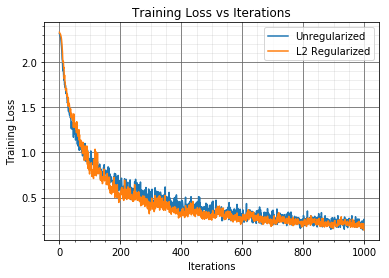

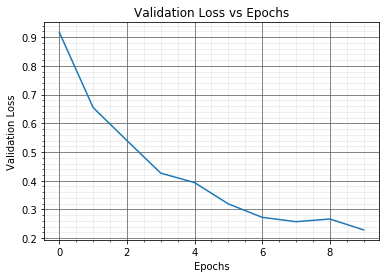

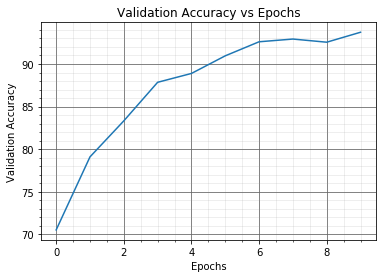

In [ ]:
plt.figure(1)
xtrainloss=np.arange(len(trainingloss_list))
plt.plot(xtrainloss,trainingloss_list,label="Unregularized")
plt.plot(xtrainloss,trainingloss_listr,label="L2 Regularized")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Iterations')

plt.figure(2)
xvalloss=np.arange(len(validationloss_list))
plt.plot(xvalloss,validationloss_list)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs Epochs')

plt.figure(3)
plt.plot(xvalloss,validationaccuracy_list)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs Epochs')

plt.show()

In [ ]:
model2.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
      images = images.reshape(-1, 28, 28) 
      outputs = model2(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

    print('Test Accuracy of the unregularized model on the 10000 test images: {} %'.format((correct / total) * 100))
    
model2r.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
      images = images.reshape(-1, 28, 28) 
      outputs = model2r(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

    print('Test Accuracy of the L2 Regularized model on the 10000 test images: {} %'.format((correct / total) * 100))

Test Accuracy of the unregularized model on the 10000 test images: 97.65 %
Test Accuracy of the L2 Regularized model on the 10000 test images: 97.8 %


In [ ]:
class BIRNN(nn.Module):
  def __init__(self):
    super(BIRNN, self).__init__()
    self.rnn = nn.RNN(28,100,1,bidirectional=True)
    self.layer2 = nn.Linear(200, 10)
    
  def forward(self, X):
    X = X.permute(1, 0, 2)
    hiddenlayer=torch.zeros(2,X.size(1),100)
    _,hiddenlayer = self.rnn(X,hiddenlayer)
    finp,binp=hiddenlayer[0],hiddenlayer[1]
    inp=torch.cat((finp,binp),dim=-1)
    out = self.layer2(inp)
    return out

In [ ]:
learning_rate = 0.002
epochs = 10
regul=0.001
criterion3 = nn.CrossEntropyLoss()

In [ ]:
trainingloss_list = []
validationloss_list = []
validationaccuracy_list = []
model3=BIRNN()
optimizer3 = torch.optim.Adam(model3.parameters(), lr=learning_rate)

for epoch in range(epochs):
  for i, (images, labels) in enumerate(trainloader):
    images = images.reshape(-1, 28, 28)
    outputs = model3(images)
    loss = criterion3(outputs, labels)
    trainingloss_list.append(loss.item())
    
    optimizer3.zero_grad()
    loss.backward()
    optimizer3.step()
    
  iteration=0
  tempvalloss=0
  correctval=0    
  
  for images, labels in valloader:
    images = images.reshape(-1, 28, 28) 
    outputs = model3(images)
    loss = criterion3(outputs, labels)
    _, predicted = torch.max(outputs.data, 1)
    correctval += (predicted == labels).sum().item()
    iteration+=1
    tempvalloss+=loss.item()
      
  validationloss_list.append(tempvalloss/iteration)
  validationaccuracy_list.append(correctval/100)
  print('Epoch',epoch+1,'out of',epochs,'epochs are over')

In [ ]:
model3r=LSTM()
optimizer3r = torch.optim.Adam(model3r.parameters(), lr=learning_rate)
trainingloss_listr = []

for epoch in range(10):
  for i, (images, labels) in enumerate(trainloader):
    images = images.reshape(-1, 28, 28) 
    outputs = model3r(images)
    loss= criterion3(outputs, labels) + regul*torch.norm(model3r.layer2.weight)
    trainingloss_listr.append(loss.item())
    
    optimizer3r.zero_grad()
    loss.backward()
    optimizer3r.step()
  print('Epoch',epoch+1,'out of',epochs,'epochs are over')

Epoch 1 out of 10 epochs are over
Epoch 2 out of 10 epochs are over
Epoch 3 out of 10 epochs are over
Epoch 4 out of 10 epochs are over
Epoch 5 out of 10 epochs are over
Epoch 6 out of 10 epochs are over
Epoch 7 out of 10 epochs are over
Epoch 8 out of 10 epochs are over
Epoch 9 out of 10 epochs are over
Epoch 10 out of 10 epochs are over


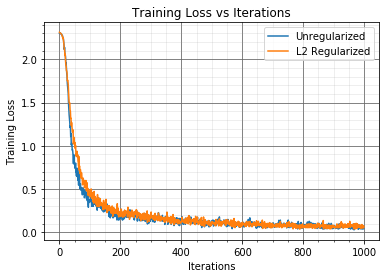

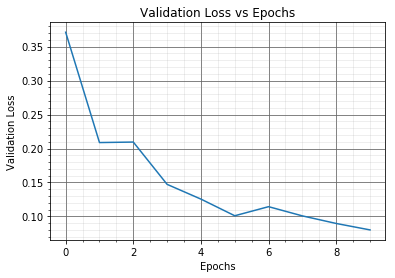

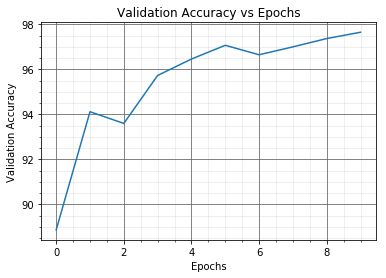

In [ ]:
plt.figure(1)
xtrainloss=np.arange(len(trainingloss_list))
plt.plot(xtrainloss,trainingloss_list,label="Unregularized")
plt.plot(xtrainloss,trainingloss_listr,label="L2 Regularized")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Iterations')

plt.figure(2)
xvalloss=np.arange(len(validationloss_list))
plt.plot(xvalloss,validationloss_list)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs Epochs')

plt.figure(3)
plt.plot(xvalloss,validationaccuracy_list)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs Epochs')

plt.show()

In [ ]:
model3.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
      images = images.reshape(-1, 28, 28) 
      outputs = model3(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

    print('Test Accuracy of the Unregularized model on the 10000 test images: {} %'.format((correct / total) * 100))
    
model3r.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
      images = images.reshape(-1, 28, 28) 
      outputs = model3r(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model L2 Regularized on the 10000 test images: {} %'.format((correct / total) * 100))

Test Accuracy of the Unregularized model on the 10000 test images: 96.71 %
Test Accuracy of the model L2 Regularized on the 10000 test images: 97.52 %


Prediction: [4. 4. 3. 4. 2.]
Real label: [4. 4. 3. 4. 2.]
Images:


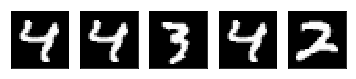

In [ ]:
ix=1
a=(5*np.abs(np.random.rand(5))).astype(int)
predict=np.zeros(5)
actual=np.zeros(5)
fig,ax = plt.subplots()
for i in range(5):
  ax=plt.subplot(1,5,ix)
  ax.set_xticks([])
  ax.set_yticks([])
  im=ax.imshow(images[a[i]],cmap='gray')
  _,predicted=torch.max(model2r(images)[a[i]],0)
  predict[i]=predicted.item()
  actual[i]=labels[a[i]]
  ix+=1
plt.show
print('Prediction:',predict)
print('Real label:',actual)
print('Images:')

In [ ]:
def rannumbcreator(L):
  ranlist=np.random.randint(0,10,L)
  return ranlist

def getonehot(X):
  x_ohe = np.zeros((len(X), 10))
  x_ohe[np.arange(len(X)), X] = 1
  return x_ohe 

In [ ]:
class LSTMQ2(nn.Module):
  def __init__(self,hidsize):
    super(LSTMQ2, self).__init__()
    self.hidsize=hidsize
    self.lstm = nn.LSTM(10,hidsize)
    self.layer2 = nn.Linear(hidsize, 10)
    
  def forward(self, X):
    hiddenstate=torch.zeros(1,X.size(0),self.hidsize)
    cellstate=torch.zeros(1,X.size(0),self.hidsize)
    X=X.permute(1,0,2)
    out,(hs,cs) = self.lstm(X,(hiddenstate,cellstate)) 
    out = self.layer2(out[-1])
    return out.reshape(1,10)

In [ ]:
learning_rate = 0.003
epochs = 10
criterion4 = nn.CrossEntropyLoss()

In [ ]:
trainranlist=[]
valranlist=[]
testranlist=[]
for i in range(100):
  for j in range(3,11):
    trainranlist.append(rannumbcreator(j))
  L=np.random.randint(3,11)
  valranlist.append(rannumbcreator(L))
  L=np.random.randint(3,11)
  testranlist.append(rannumbcreator(L))   

In [ ]:
K=1
hidstatesize=[2,5,10]
traininglosslist2=[]
validationaccuracy_list2=[]
traininglosslist5=[]
validationaccuracy_list5=[]
traininglosslist10=[]
validationaccuracy_list10=[]

iteration=0
tempvalloss=0
correctval=0  

model41=LSTMQ2(hidstatesize[0])
optimizer41 = torch.optim.Adam(model41.parameters(), lr=learning_rate)

for epoch in range(epochs):
  for i in range(len(trainranlist)):  
    hotranlist=torch.zeros((1,len(trainranlist[i]),10))
    hotranlist[0]=torch.from_numpy(getonehot(trainranlist[i]))
    
    output=model41(hotranlist.float())
    _,predicted=torch.max(output.data,1)
    
    label=torch.tensor([trainranlist[i][K]],dtype=torch.long)
    loss = criterion4(output, label.long())
    traininglosslist2.append(loss.item())
    
    optimizer41.zero_grad()
    loss.backward()
    optimizer41.step()
  
  iteration=0
  tempvalloss=0
  correctval=0 
    
  for i in range(len(valranlist)):  
    hotranlist=torch.zeros((1,len(valranlist[i]),10))
    hotranlist[0]=torch.from_numpy(getonehot(valranlist[i]))
    
    output=model41(hotranlist.float())
    _,predicted=torch.max(output.data,1)
    
    label=torch.tensor([valranlist[i][K]],dtype=torch.long)
    _, predicted = torch.max(output.data, 1)
    correctval += (predicted == label).sum().item()
    iteration+=1
      
  validationaccuracy_list2.append(correctval/len(valranlist)*100)


model42=LSTMQ2(hidstatesize[1])
optimizer42 = torch.optim.Adam(model42.parameters(), lr=learning_rate)

for epoch in range(epochs):
  for i in range(len(trainranlist)):  
    hotranlist=torch.zeros((1,len(trainranlist[i]),10))
    hotranlist[0]=torch.from_numpy(getonehot(trainranlist[i]))
    
    output=model42(hotranlist.float())
    _,predicted=torch.max(output.data,1)
    
    label=torch.tensor([trainranlist[i][K]],dtype=torch.long)
    loss = criterion4(output, label.long())
    traininglosslist5.append(loss.item())
    
    optimizer42.zero_grad()
    loss.backward()
    optimizer42.step()
    
  iteration=0
  tempvalloss=0
  correctval=0 
  
  for i in range(len(valranlist)):  
    hotranlist=torch.zeros((1,len(valranlist[i]),10))
    hotranlist[0]=torch.from_numpy(getonehot(valranlist[i]))
    
    output=model42(hotranlist.float())
    _,predicted=torch.max(output.data,1)
    
    label=torch.tensor([valranlist[i][K]],dtype=torch.long)
    _, predicted = torch.max(output.data, 1)
    correctval += (predicted == label).sum().item()
    iteration+=1
      
  validationaccuracy_list5.append(correctval/len(valranlist)*100)
  

model43=LSTMQ2(hidstatesize[2])
optimizer43 = torch.optim.Adam(model43.parameters(), lr=learning_rate)

for epoch in range(epochs):
  for i in range(len(trainranlist)):  
    hotranlist=torch.zeros((1,len(trainranlist[i]),10))
    hotranlist[0]=torch.from_numpy(getonehot(trainranlist[i]))
    
    output=model43(hotranlist.float())
    _,predicted=torch.max(output.data,1)
    
    label=torch.tensor([trainranlist[i][K]],dtype=torch.long)
    loss = criterion4(output, label.long())
    traininglosslist10.append(loss.item())
    
    optimizer43.zero_grad()
    loss.backward()
    optimizer43.step()
    
  iteration=0
  tempvalloss=0
  correctval=0 

  for i in range(len(valranlist)):  
    hotranlist=torch.zeros((1,len(valranlist[i]),10))
    hotranlist[0]=torch.from_numpy(getonehot(valranlist[i]))
    
    output=model43(hotranlist.float())
    _,predicted=torch.max(output.data,1)
    
    label=torch.tensor([valranlist[i][K]],dtype=torch.long)
    _, predicted = torch.max(output.data, 1)
    correctval += (predicted == label).sum().item()
    iteration+=1
      
  validationaccuracy_list10.append(correctval/len(valranlist)*100)

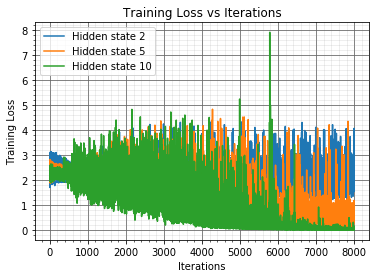

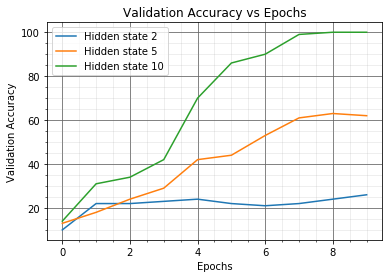

In [ ]:
plt.figure(1)
xtrainloss=np.arange(len(traininglosslist2))
plt.plot(xtrainloss,traininglosslist2,label="Hidden state 2")
plt.plot(xtrainloss,traininglosslist5,label="Hidden state 5")
plt.plot(xtrainloss,traininglosslist10,label="Hidden state 10")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Iterations')
plt.legend()

plt.figure(2)
xvalloss=np.arange(len(validationaccuracy_list2))
plt.plot(xvalloss,validationaccuracy_list2,label="Hidden state 2")
plt.plot(xvalloss,validationaccuracy_list5,label="Hidden state 5")
plt.plot(xvalloss,validationaccuracy_list10,label="Hidden state 10")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-',chastised husband stories alpha=0.2)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs Epochs')
plt.legend()
plt.show()

In [ ]:
model41.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for i in range(len(testranlist)):
      hotranlist=torch.zeros((1,len(testranlist[i]),10))
      hotranlist[0]=torch.from_numpy(getonehot(testranlist[i]))
      output=model41(hotranlist.float())
      label=torch.tensor([testranlist[i][K]],dtype=torch.long)
      _, predicted = torch.max(output.data, 1)
      correct += (predicted == label).sum().item()

    print('Test Accuracy of the model with 2 hidden states on the 100 test samples: {} %'.format((correct / len(testranlist)) * 100))
    
model42.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for i in range(len(testranlist)):
      hotranlist=torch.zeros((1,len(testranlist[i]),10))
      hotranlist[0]=torch.from_numpy(getonehot(testranlist[i]))
      output=model42(hotranlist.float())
      label=torch.tensor([testranlist[i][K]],dtype=torch.long)
      _, predicted = torch.max(output.data, 1)
      correct += (predicted == label).sum().item()

    print('Test Accuracy of the model with 5 hidden states on the 100 test samples: {} %'.format((correct / len(testranlist)) * 100))
    
model43.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for i in range(len(testranlist)):
      hotranlist=torch.zeros((1,len(testranlist[i]),10))
      hotranlist[0]=torch.from_numpy(getonehot(testranlist[i]))
      output=model43(hotranlist.float())
      label=torch.tensor([testranlist[i][K]],dtype=torch.long)
      _, predicted = torch.max(output.data, 1)
      correct += (predicted == label).sum().item()

    print('Test Accuracy of the model with 10 hidden states on the 100 test samples: {} %'.format((correct / len(testranlist)) * 100))

Test Accuracy of the model with 2 hidden states on the 100 test samples: 18.0 %
Test Accuracy of the model with 5 hidden states on the 100 test samples: 65.0 %
Test Accuracy of the model with 10 hidden states on the 100 test samples: 100.0 %


In [ ]:
for i in range(3,11):
  print("For Length",i)
  for j in range(3):
      a=rannumbcreator(i)
      hotranlist=torch.zeros((1,len(a),10))
      hotranlist[0]=torch.from_numpy(getonehot(a))
      output=model43(hotranlist.float())
      label=torch.tensor([a[K]],dtype=torch.long)
      _, predicted = torch.max(output.data, 1)
      print("Array:",a,"Prediction at position 2:",predicted.item())

For Length 3
Array: [8 2 4] Prediction at position 2: 2
Array: [3 0 4] Prediction at position 2: 0
Array: [8 1 7] Prediction at position 2: 1
For Length 4
Array: [0 2 6 4] Prediction at position 2: 2
Array: [6 9 9 6] Prediction at position 2: 9
Array: [0 4 2 7] Prediction at position 2: 4
For Length 5
Array: [7 6 3 7 9] Prediction at position 2: 6
Array: [7 4 0 3 7] Prediction at position 2: 4
Array: [0 4 2 7 1] Prediction at position 2: 4
For Length 6
Array: [8 9 5 6 8 6] Prediction at position 2: 9
Array: [2 9 2 3 5 4] Prediction at position 2: 9
Array: [4 2 2 2 5 5] Prediction at position 2: 2
For Length 7
Array: [2 5 2 9 2 2 3] Prediction at position 2: 5
Array: [2 6 9 8 1 1 2] Prediction at position 2: 6
Array: [6 0 3 0 6 2 4] Prediction at position 2: 0
For Length 8
Array: [8 2 7 0 2 8 6 2] Prediction at position 2: 2
Array: [0 6 6 3 3 5 9 9] Prediction at position 2: 6
Array: [1 7 8 0 6 9 2 8] Prediction at position 2: 7
For Length 9
Array: [3 7 1 7 9 8 6 9 8] Prediction at posi

In [ ]:
def binsgenerator(L):
  N1=np.random.randint(0,2**(L-1))
  N2=np.random.randint(0,2**(L-1))
  S=N1+N2
  binlen=L
  B1=np.zeros((1,binlen))
  B2=np.zeros((1,binlen))
  B3=np.zeros((binlen))
  b=np.flip(np.array(list(np.binary_repr(N1)), dtype=int))
  B1[0][0:len(b)]=b[0:]
  b=np.flip(np.array(list(np.binary_repr(N2)), dtype=int))
  B2[0][0:len(b)]=b[0:]
  b=np.flip(np.array(list(np.binary_repr(S)), dtype=int))
  B3[0:len(b)]=b[0:]
  return(np.concatenate((np.transpose(B1),np.transpose(B2)),axis=1),B3)  

In [ ]:
traininput=[]
trainoutput=[]
for i in range(250):
  L=np.random.randint(1,21)
  a,b=binsgenerator(L)
  traininput.append(a)
  trainoutput.append(b)
  
testinput=[]
testoutput=[]
for i in range(100):
  L=np.random.randint(1,21)
  a,b=binsgenerator(L)
  testinput.append(a)
  testoutput.append(b)
  
fintestinput=[]
fintestoutput=[]
for j in range(1,21):
  for i in range(100):
    a,b=binsgenerator(j)
    fintestinput.append(a)
    fintestoutput.append(b)

In [ ]:
class LSTMQ3(nn.Module):
  def __init__(self,hidsize):
    super(LSTMQ3, self).__init__()
    self.hidsize=hidsize
    self.lstm = nn.LSTM(2,hidsize)
    self.layer2 = nn.Sequential(
        nn.Linear(hidsize,1),
        nn.Sigmoid())
    
  def forward(self, X):
    X=X.permute(1,0,2)
    hiddenstate=torch.zeros(1,X.size(1),self.hidsize)
    cellstate=torch.zeros(1,X.size(1),self.hidsize)
    out,(hs,cs) = self.lstm(X,(hiddenstate,cellstate))
    out = self.layer2(out)
    return out.reshape(X.size(0))

In [ ]:
learning_rate = 0.01
epochs = 5
criterion5 = nn.MSELoss()
model51=LSTMQ3(3)
optimizer51 = torch.optim.Adam(model51.parameters(), lr=learning_rate)
model52=LSTMQ3(10)
optimizer52 = torch.optim.Adam(model52.parameters(), lr=learning_rate)

In [ ]:
traininglosslist=[]
testlosslist=[]
correcttestlist=[]
for epoch in range(epochs):
  for i in range(int(len(traininput))):
    a=torch.zeros((1,traininput[i].shape[0],traininput[i].shape[1]))
    a[0]=torch.from_numpy(traininput[i])
    output=model51(a.float())
    label=torch.tensor(np.transpose(trainoutput[i]))
    loss = criterion5(output,label.float())
    traininglosslist.append(loss.item())
      
    optimizer51.zero_grad()
    loss.backward()
    optimizer51.step()
    
  iteration=0
  tempvalloss=0
  correctval=0 
    
  for i in range(len(testinput)):
    correct=0
    a=torch.zeros((1,testinput[i].shape[0],testinput[i].shape[1]))
    a[0]=torch.from_numpy(testinput[i])
    output=model51(a.float())
    label=torch.tensor(np.transpose(testoutput[i]))
    loss = criterion5(output,label.float())
    iteration+=1
    tempvalloss+=loss.item()
    
    predicted=torch.zeros(output.shape)
    predicted[output>=0.5]=1
    predicted[output<0.5]=0
    correct += (predicted == label.float()).sum().item()/len(label)
    
  correcttestlist.append(100*correct/iteration)
  testlosslist.append(tempvalloss/iteration)
  print('Epoch',epoch+1,'out of',epochs,'epochs are over')

Epoch 1 out of 5 epochs are over
Epoch 2 out of 5 epochs are over
Epoch 3 out of 5 epochs are over
Epoch 4 out of 5 epochs are over
Epoch 5 out of 5 epochs are over


In [ ]:
traininglosslist2=[]
testlosslist2=[]
correcttestlist2=[]
for epoch in range(epochs):
  for i in range(len(traininput)):
    a=torch.zeros((1,traininput[i].shape[0],traininput[i].shape[1]))
    a[0]=torch.from_numpy(traininput[i])
    output=model52(a.float())
    label=torch.tensor(np.transpose(trainoutput[i]))
    loss = criterion5(output,label.float())
    traininglosslist2.append(loss.item())
      
    optimizer52.zero_grad()
    loss.backward()
    optimizer52.step()
    
  iteration=0
  tempvalloss=0
  correctval=0 
    
  for i in range(len(testinput)):
    correct=0
    a=torch.zeros((1,testinput[i].shape[0],testinput[i].shape[1]))
    a[0]=torch.from_numpy(testinput[i])
    output=model52(a.float())
    label=torch.tensor(np.transpose(testoutput[i]))
    loss = criterion5(output,label.float())
    iteration+=1
    tempvalloss+=loss.item()
    
    predicted=torch.zeros(output.shape)
    predicted[output>=0.5]=1
    predicted[output<0.5]=0
    correct += (predicted == label.float()).sum().item()/len(label)
    
  correcttestlist2.append(100*correct/iteration)
  testlosslist2.append(tempvalloss/iteration)
  print('Epoch',epoch+1,'out of',epochs,'epochs are over')

Epoch 1 out of 5 epochs are over
Epoch 2 out of 5 epochs are over
Epoch 3 out of 5 epochs are over
Epoch 4 out of 5 epochs are over
Epoch 5 out of 5 epochs are over


In [ ]:
plt.figure(1)
xtrainloss=np.arange(len(traininglosslist))
plt.plot(xtrainloss,traininglosslist,label="Hidden State Size = 3")
plt.plot(xtrainloss,traininglosslist2,label="Hidden State Size = 10")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Iterations')
plt.legend()

plt.figure(2)
xtestloss=np.arange(len(testlosslist))
plt.plot(xtestloss,testlosslist,label="Hidden State Size = 3")
plt.plot(xtestloss,testlosslist2,label="Hidden State Size = 10")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel('Iterations')
plt.ylabel('Val Loss')
plt.title('Validation Loss vs Iterations')
plt.legend()

plt.figure(3)
xbittrain=np.arange(len(correcttestlist))
plt.plot(xbittrain,correcttestlist,label="Hidden State Size = 3")
plt.plot(xbittrain,correcttestlist2,label="Hidden State Size = 10")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel('Iterations')
plt.ylabel('Validation Bit Accuracy')
plt.title('Validation Bit Accuracy vs Iterations')
plt.legend()


plt.show()


In [ ]:
model51.eval()
correctarr1 = np.zeros(20)
correctarr2 = np.zeros(20)
with torch.no_grad():
    for i in range(len(fintestinput)):
      a=torch.zeros((1,fintestinput[i].shape[0],fintestinput[i].shape[1]))
      a[0]=torch.from_numpy(fintestinput[i])
      output=model51(a.float())
      label=torch.tensor(np.transpose(fintestoutput[i]))
      predicted=torch.zeros(output.shape)
      predicted[output>=0.5]=1
      predicted[output<0.5]=0
      correctarr1[len(label)-1] += (predicted == label.float()).sum().item()/(len(label))


    print('Bit accuracy when hidden states = 3:',(np.sum(correctarr1)/20))

model52.eval()    
with torch.no_grad():
    for i in range(len(fintestinput)):
      a=torch.zeros((1,fintestinput[i].shape[0],fintestinput[i].shape[1]))
      a[0]=torch.from_numpy(fintestinput[i])
      output=model52(a.float())
      label=torch.tensor(np.transpose(fintestoutput[i]))
      predicted=torch.zeros(output.shape)
      predicted[output>0.5]=1
      predicted[output<=0.5]=0
      correctarr2[len(label)-1] += (predicted == label.float()).sum().item()/(len(label))
    print('Bit accuracy when hidden states = 10:',(np.sum(correctarr2)/20))

Bit accuracy when hidden states = 3: 72.54317763119232
Bit accuracy when hidden states = 10: 100.0


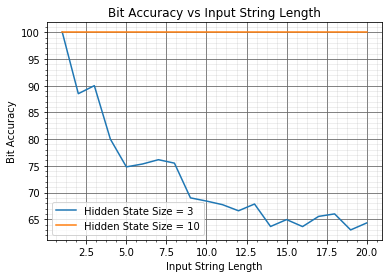

In [ ]:
x=np.arange(1,21)
plt.figure(1)
plt.plot(x,correctarr1,label="Hidden State Size = 3")
plt.plot(x,correctarr2,label="Hidden State Size = 10")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel('Input String Length')
plt.ylabel('Bit Accuracy')
plt.title('Bit Accuracy vs Input String Length')
plt.legend()
plt.show()

In [ ]:
learning_rate = 0.01
epochs = 5
criterion5 = nn.MSELoss()
model53=LSTMQ3(5)
optimizer53 = torch.optim.Adam(model53.parameters(), lr=learning_rate)
model54=LSTMQ3(5)
optimizer54 = torch.optim.Adam(model54.parameters(), lr=learning_rate)

In [ ]:
traininglosslist=[]
testlosslist=[]
correcttestlist=[]
for epoch in range(epochs):
  for i in range(int(len(traininput))):
    a=torch.zeros((1,traininput[i].shape[0],traininput[i].shape[1]))
    a[0]=torch.from_numpy(traininput[i])
    output=model53(a.float())
    label=torch.tensor(np.transpose(trainoutput[i]))
    loss = criterion5(output,label.float())
    traininglosslist.append(loss.item())
      
    optimizer53.zero_grad()
    loss.backward()
    optimizer53.step()
    
  iteration=0
  tempvalloss=0
  correctval=0 
    
  for i in range(len(testinput)):
    correct=0
    a=torch.zeros((1,testinput[i].shape[0],testinput[i].shape[1]))
    a[0]=torch.from_numpy(testinput[i])
    output=model53(a.float())
    label=torch.tensor(np.transpose(testoutput[i]))
    loss = criterion5(output,label.float())
    iteration+=1
    tempvalloss+=loss.item()
    
    predicted=torch.zeros(output.shape)
    predicted[output>=0.5]=1
    predicted[output<0.5]=0
    correct += (predicted == label.float()).sum().item()/len(label)
    
  correcttestlist.append(100*correct/iteration)
  testlosslist.append(tempvalloss/iteration)
  print('Epoch',epoch+1,'out of',epochs,'epochs are over')

Epoch 1 out of 5 epochs are over
Epoch 2 out of 5 epochs are over
Epoch 3 out of 5 epochs are over
Epoch 4 out of 5 epochs are over
Epoch 5 out of 5 epochs are over


In [ ]:
traininglosslist2=[]
testlosslist2=[]
correcttestlist2=[]
for epoch in range(epochs):
  for i in range(int(len(traininput))):
    a=torch.zeros((1,traininput[i].shape[0],traininput[i].shape[1]))
    a[0]=torch.from_numpy(traininput[i])
    output=model54(a.float())
    label=torch.tensor(np.transpose(trainoutput[i]))
    loss = torch.sum(-1*torch.log(output.clamp(1e-10))*label.float())
    traininglosslist2.append(loss.item())
      
    optimizer54.zero_grad()
    loss.backward()
    optimizer54.step()
    
  iteration=0
  tempvalloss=0
  correctval=0 
    
  for i in range(len(testinput)):
    correct=0
    a=torch.zeros((1,testinput[i].shape[0],testinput[i].shape[1]))
    a[0]=torch.from_numpy(testinput[i])
    output=model54(a.float())
    label=torch.tensor(np.transpose(testoutput[i]))
    loss = torch.sum(-1*torch.log(output.clamp(1e-10))*label.float())
    iteration+=1
    tempvalloss+=loss.item()
    
    predicted=torch.zeros(output.shape)
    predicted[output>=0.5]=1
    predicted[output<0.5]=0
    correct += (predicted == label.float()).sum().item()/len(label)
    
  correcttestlist2.append(100*correct/iteration)
  testlosslist2.append(tempvalloss/iteration)
  print('Epoch',epoch+1,'out of',epochs,'epochs are over')

Epoch 1 out of 5 epochs are over
Epoch 2 out of 5 epochs are over
Epoch 3 out of 5 epochs are over
Epoch 4 out of 5 epochs are over
Epoch 5 out of 5 epochs are over


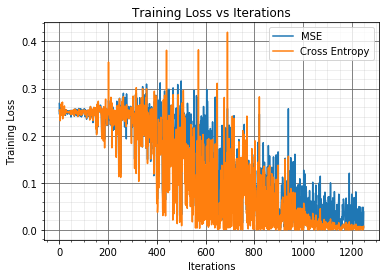

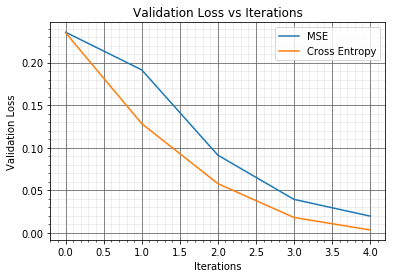

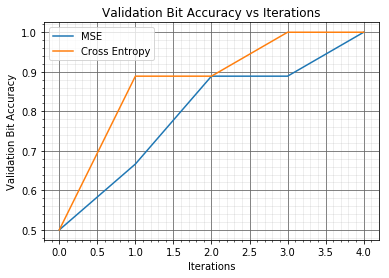

In [ ]:
plt.figure(1)
xtrainloss=np.arange(len(traininglosslist))
plt.plot(xtrainloss,traininglosslist,label="MSE")
plt.plot(xtrainloss,traininglosslist2,label="Cross Entropy")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Iterations')
plt.legend()

plt.figure(2)
xtestloss=np.arange(len(testlosslist))
plt.plot(xtestloss,testlosslist,label="MSE")
plt.plot(xtestloss,testlosslist2,label="Cross Entropy")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel('Iterations')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs Iterations')
plt.legend()

plt.figure(3)
xbittrain=np.arange(len(correcttestlist))
plt.plot(xbittrain,correcttestlist,label="MSE")
plt.plot(xbittrain,correcttestlist2,label="Cross Entropy")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel('Iterations')
plt.ylabel('Validation Bit Accuracy')
plt.title('Validation Bit Accuracy vs Iterations')
plt.legend()


plt.show()

In [ ]:
model53.eval()
correctarr1 = np.zeros(20)
correctarr2 = np.zeros(20)
with torch.no_grad():
    for i in range(len(fintestinput)):
      a=torch.zeros((1,fintestinput[i].shape[0],fintestinput[i].shape[1]))
      a[0]=torch.from_numpy(fintestinput[i])
      output=model53(a.float())
      label=torch.tensor(np.transpose(fintestoutput[i]))
      predicted=torch.zeros(output.shape)
      predicted[output>=0.5]=1
      predicted[output<0.5]=0
      correctarr1[len(label)-1] += (predicted == label.float()).sum().item()/(len(label))


    print('Bit accuracy with MSE:',(np.sum(correctarr1)/20))

model54.eval()    
with torch.no_grad():
    for i in range(len(fintestinput)):
      a=torch.zeros((1,fintestinput[i].shape[0],fintestinput[i].shape[1]))
      a[0]=torch.from_numpy(fintestinput[i])
      output=model54(a.float())
      label=torch.tensor(np.transpose(fintestoutput[i]))
      predicted=torch.zeros(output.shape)
      predicted[output>0.5]=1
      predicted[output<=0.5]=0
      correctarr2[len(label)-1] += (predicted == label.float()).sum().item()/(len(label))
    print('Bit accuracy with Cross Entropy:',(np.sum(correctarr2)/20))

Bit accuracy with MSE: 92.77695416425678
Bit accuracy with Cross Entropy: 46.48938980867773


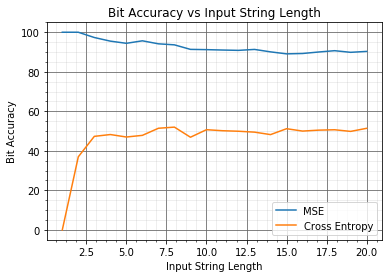

In [ ]:
x=np.arange(1,21)
plt.figure(1)
plt.plot(x,correctarr1,label="MSE")
plt.plot(x,correctarr2,label="Cross Entropy")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel('Input String Length')
plt.ylabel('Bit Accuracy')
plt.title('Bit Accuracy vs Input String Length')
plt.legend()
plt.show()

In [ ]:
traininput3=[]
trainoutput3=[]
for i in range(250):
  a,b=binsgenerator(3)
  traininput3.append(a)
  trainoutput3.append(b)
  
traininput5=[]
trainoutput5=[]
for i in range(250):
  a,b=binsgenerator(5)
  traininput5.append(a)
  trainoutput5.append(b)
  
traininput10=[]
trainoutput10=[]
for i in range(250):
  a,b=binsgenerator(10)
  traininput10.append(a)
  trainoutput10.append(b)

In [ ]:
learning_rate = 0.01
epochs = 5
criterion5 = nn.MSELoss()
model55=LSTMQ3(5)
optimizer55 = torch.optim.Adam(model55.parameters(), lr=learning_rate)
model56=LSTMQ3(5)
optimizer56 = torch.optim.Adam(model56.parameters(), lr=learning_rate)
model57=LSTMQ3(5)
optimizer57 = torch.optim.Adam(model57.parameters(), lr=learning_rate)

In [ ]:
traininglosslist=[]
testlosslist=[]
correcttestlist=[]
for epoch in range(epochs):
  for i in range(len(traininput3)):
    a=torch.zeros((1,traininput3[i].shape[0],traininput3[i].shape[1]))
    a[0]=torch.from_numpy(traininput3[i])
    output=model55(a.float())
    label=torch.tensor(np.transpose(trainoutput3[i]))
    loss = criterion5(output,label.float())
    traininglosslist.append(loss.item())
      
    optimizer55.zero_grad()
    loss.backward()
    optimizer55.step()
    
  iteration=0
  tempvalloss=0
  correctval=0 
    
  for i in range(len(testinput)):
    correct=0
    a=torch.zeros((1,testinput[i].shape[0],testinput[i].shape[1]))
    a[0]=torch.from_numpy(testinput[i])
    output=model55(a.float())
    label=torch.tensor(np.transpose(testoutput[i]))
    loss = criterion5(output,label.float())
    iteration+=1
    tempvalloss+=loss.item()
    
    predicted=torch.zeros(output.shape)
    predicted[output>=0.5]=1
    predicted[output<0.5]=0
    correct += (predicted == label.float()).sum().item()/len(label)
    
  correcttestlist.append(100*correct/iteration)
  testlosslist.append(tempvalloss/iteration)
  print('Epoch',epoch+1,'out of',epochs,'epochs are over')

Epoch 1 out of 5 epochs are over
Epoch 2 out of 5 epochs are over
Epoch 3 out of 5 epochs are over
Epoch 4 out of 5 epochs are over
Epoch 5 out of 5 epochs are over


In [ ]:
traininglosslist2=[]
testlosslist2=[]
correcttestlist2=[]
for epoch in range(epochs):
  for i in range(int(len(traininput5))):
    a=torch.zeros((1,traininput5[i].shape[0],traininput5[i].shape[1]))
    a[0]=torch.from_numpy(traininput5[i])
    output=model56(a.float())
    label=torch.tensor(np.transpose(trainoutput5[i]))
    loss = criterion5(output,label.float())
    traininglosslist2.append(loss.item())
      
    optimizer56.zero_grad()
    loss.backward()
    optimizer56.step()
    
  iteration=0
  tempvalloss=0
  correctval=0 
    
  for i in range(len(testinput)):
    correct=0
    a=torch.zeros((1,testinput[i].shape[0],testinput[i].shape[1]))
    a[0]=torch.from_numpy(testinput[i])
    output=model56(a.float())
    label=torch.tensor(np.transpose(testoutput[i]))
    loss = criterion5(output,label.float())
    iteration+=1
    tempvalloss+=loss.item()
    
    predicted=torch.zeros(output.shape)
    predicted[output>=0.5]=1
    predicted[output<0.5]=0
    correct += (predicted == label.float()).sum().item()/len(label)
    
  correcttestlist2.append(100*correct/iteration)
  testlosslist2.append(tempvalloss/iteration)
  print('Epoch',epoch+1,'out of',epochs,'epochs are over')

Epoch 1 out of 5 epochs are over
Epoch 2 out of 5 epochs are over
Epoch 3 out of 5 epochs are over
Epoch 4 out of 5 epochs are over
Epoch 5 out of 5 epochs are over


In [ ]:
traininglosslist3=[]
testlosslist3=[]
correcttestlist3=[]
for epoch in range(epochs):
  for i in range(int(len(traininput10))):
    a=torch.zeros((1,traininput10[i].shape[0],traininput10[i].shape[1]))
    a[0]=torch.from_numpy(traininput10[i])
    output=model57(a.float())
    label=torch.tensor(np.transpose(trainoutput10[i]))
    loss = criterion5(output,label.float())
    traininglosslist3.append(loss.item())
      
    optimizer57.zero_grad()
    loss.backward()
    optimizer57.step()
    
  iteration=0
  tempvalloss=0
  correctval=0 
    
  for i in range(len(testinput)):
    correct=0
    a=torch.zeros((1,testinput[i].shape[0],testinput[i].shape[1]))
    a[0]=torch.from_numpy(testinput[i])
    output=model57(a.float())
    label=torch.tensor(np.transpose(testoutput[i]))
    loss = criterion5(output,label.float())
    iteration+=1
    tempvalloss+=loss.item()
    
    predicted=torch.zeros(output.shape)
    predicted[output>=0.5]=1
    predicted[output<0.5]=0
    correct += (predicted == label.float()).sum().item()/len(label)
    
  correcttestlist3.append(100*correct/iteration)
  testlosslist3.append(tempvalloss/iteration)
  print('Epoch',epoch+1,'out of',epochs,'epochs are over')

Epoch 1 out of 5 epochs are over
Epoch 2 out of 5 epochs are over
Epoch 3 out of 5 epochs are over
Epoch 4 out of 5 epochs are over
Epoch 5 out of 5 epochs are over


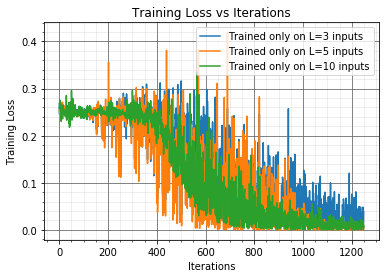

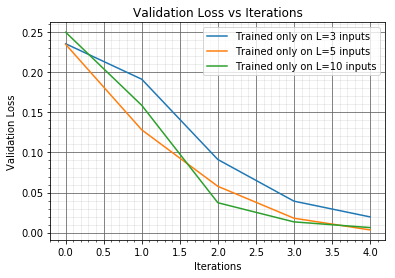

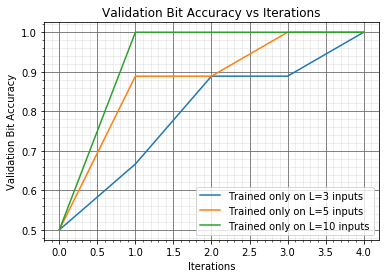

In [ ]:
plt.figure(1)
xtrainloss=np.arange(len(traininglosslist))
plt.plot(xtrainloss,traininglosslist,label="Trained only on L=3 inputs")
plt.plot(xtrainloss,traininglosslist2,label="Trained only on L=5 inputs")
plt.plot(xtrainloss,traininglosslist3,label="Trained only on L=10 inputs")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Iterations')
plt.legend()

plt.figure(2)
xtestloss=np.arange(len(testlosslist))
plt.plot(xtestloss,testlosslist,label="Trained only on L=3 inputs")
plt.plot(xtestloss,testlosslist2,label="Trained only on L=5 inputs")
plt.plot(xtestloss,testlosslist3,label="Trained only on L=10 inputs")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel('Iterations')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs Iterations')
plt.legend()

plt.figure(3)
xbittrain=np.arange(len(correcttestlist))
plt.plot(xbittrain,correcttestlist,label="Trained only on L=3 inputs")
plt.plot(xbittrain,correcttestlist2,label="Trained only on L=5 inputs")
plt.plot(xbittrain,correcttestlist3,label="Trained only on L=10 inputs")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel('Iterations')
plt.ylabel('Validation Bit Accuracy')
plt.title('Validation Bit Accuracy vs Iterations')
plt.legend()


plt.show()

In [ ]:
model55.eval()
correctarr1 = np.zeros(20)
correctarr2 = np.zeros(20)
correctarr3 = np.zeros(20)
with torch.no_grad():
    for i in range(len(fintestinput)):
      a=torch.zeros((1,fintestinput[i].shape[0],fintestinput[i].shape[1]))
      a[0]=torch.from_numpy(fintestinput[i])
      output=model55(a.float())
      label=torch.tensor(np.transpose(fintestoutput[i]))
      predicted=torch.zeros(output.shape)
      predicted[output>=0.5]=1
      predicted[output<0.5]=0
      correctarr1[len(label)-1] += (predicted == label.float()).sum().item()/(len(label))


    print('Bit accuracy after trained only on L=3 inputs:',(np.sum(correctarr1)/20))

model56.eval()    
with torch.no_grad():
    for i in range(len(fintestinput)):
      a=torch.zeros((1,fintestinput[i].shape[0],fintestinput[i].shape[1]))
      a[0]=torch.from_numpy(fintestinput[i])
      output=model56(a.float())
      label=torch.tensor(np.transpose(fintestoutput[i]))
      predicted=torch.zeros(output.shape)
      predicted[output>0.5]=1
      predicted[output<=0.5]=0
      correctarr2[len(label)-1] += (predicted == label.float()).sum().item()/(len(label))
    print('Bit accuracy after trained only on L=5 inputs:',(np.sum(correctarr2)/20))
    
model57.eval()    
with torch.no_grad():
    for i in range(len(fintestinput)):
      a=torch.zeros((1,fintestinput[i].shape[0],fintestinput[i].shape[1]))
      a[0]=torch.from_numpy(fintestinput[i])
      output=model57(a.float())
      label=torch.tensor(np.transpose(fintestoutput[i]))
      predicted=torch.zeros(output.shape)
      predicted[output>0.5]=1
      predicted[output<=0.5]=0
      correctarr3[len(label)-1] += (predicted == label.float()).sum().item()/(len(label))
    print('Bit accuracy after trained only on L=10 inputs:',(np.sum(correctarr3)/20))

Bit accuracy after trained only on L=3 inputs: 75.68521104755237
Bit accuracy after trained only on L=5 inputs: 91.12628740669373
Bit accuracy after trained only on L=10 inputs: 100.0


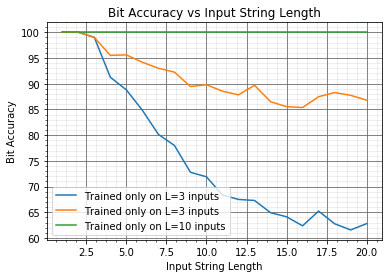

In [ ]:
x=np.arange(1,21)
plt.figure(1)
plt.plot(x,correctarr1,label="Trained only on L=3 inputs")
plt.plot(x,correctarr2,label="Trained only on L=3 inputs")
plt.plot(x,correctarr3,label="Trained only on L=10 inputs")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel('Input String Length')
plt.ylabel('Bit Accuracy')
plt.title('Bit Accuracy vs Input String Length')
plt.legend()
plt.show()